1. over sample quality categories 3, 4, 8, and 9
2. under sample quality categories 5, 6, and 7

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
#Import csv file into Pandas data frame

df = pd.read_csv('winequality-white.csv',sep=";")


In [18]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [19]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [20]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Wine Quality


Text(0.5, 1.0, 'Count of Wine Quality Ratings')

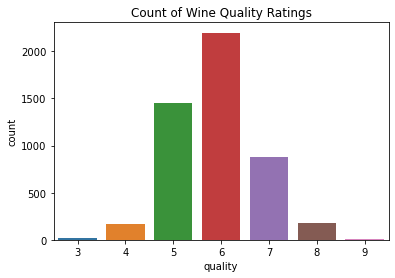

In [21]:
#Histogram of Wine Quality with Seaborn
print('Wine Quality')
sns.countplot(x='quality', data=df).set_title('Count of Wine Quality Ratings')

In [22]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

### Rename Columns

In [23]:
df = df.rename({'fixed acidity': 'fixed_acidity','volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar':'residual_sugar',  'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}, axis=1)



### Remove Outliers

In [24]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
ValueList = ('fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
            'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol')

for myValue in ValueList:
    #compute range of data
    myValueMax = df[myValue].max()
    myValueMin = df[myValue].min()
    myValueRange = myValueMax - myValueMin
    
    # Computing IQR
    Q1 = df[myValue].quantile(0.25)
    Q3 = df[myValue].quantile(0.75)
    IQR = Q3 - Q1
    gtdropvalue = (Q3 + (1.5 * IQR))
    ltdropvalue = (Q1 - (1.5 * IQR))
    
    index_names_right = df[df[myValue] >= gtdropvalue].index
    index_names_left = df[df[myValue] <= ltdropvalue].index
    df.drop(index_names_right, inplace = True)
    df.drop(index_names_left, inplace = True)
    print(myValue + ' maximum: ' + str(myValueMax))
    print(myValue + ' minimum: ' + str(myValueMin))
    print(myValue + ' Q1: ' + str(Q1))
    print(myValue + ' Q3: ' + str(Q3))
    print(myValue + ' range: ' + str(myValueRange))
    print(myValue + ' IQR: ' + str(IQR))
    print('ratio of Range fo IQR: ' + str(myValueRange/IQR))
    print()
    
   

fixed_acidity maximum: 14.2
fixed_acidity minimum: 3.8
fixed_acidity Q1: 6.3
fixed_acidity Q3: 7.3
fixed_acidity range: 10.399999999999999
fixed_acidity IQR: 1.0
ratio of Range fo IQR: 10.399999999999999

volatile_acidity maximum: 1.1
volatile_acidity minimum: 0.08
volatile_acidity Q1: 0.21
volatile_acidity Q3: 0.32
volatile_acidity range: 1.02
volatile_acidity IQR: 0.11000000000000001
ratio of Range fo IQR: 9.272727272727272

citric_acid maximum: 1.66
citric_acid minimum: 0.0
citric_acid Q1: 0.27
citric_acid Q3: 0.38
citric_acid range: 1.66
citric_acid IQR: 0.10999999999999999
ratio of Range fo IQR: 15.090909090909092

residual_sugar maximum: 31.6
residual_sugar minimum: 0.6
residual_sugar Q1: 1.8
residual_sugar Q3: 9.6
residual_sugar range: 31.0
residual_sugar IQR: 7.8
ratio of Range fo IQR: 3.9743589743589745

chlorides maximum: 0.34600000000000003
chlorides minimum: 0.012
chlorides Q1: 0.036000000000000004
chlorides Q3: 0.05
chlorides range: 0.334
chlorides IQR: 0.01399999999999999

In [25]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000,3951.000000
mean,6.809048,0.263828,0.322749,6.352759,0.042299,34.730575,136.953176,0.993844,3.189043,0.481445,10.592035,5.953936
std,0.726417,0.076298,0.083076,4.905477,0.009889,14.941739,41.049024,0.002877,0.137980,0.098904,1.214421,0.856194
min,4.900000,0.080000,0.110000,0.600000,0.016000,2.000000,19.000000,0.987110,2.830000,0.220000,8.400000,3.000000
25%,6.300000,0.210000,0.270000,1.800000,0.035000,24.000000,107.000000,0.991580,3.100000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.200000,0.042000,34.000000,132.000000,0.993520,3.180000,0.470000,10.500000,6.000000
75%,7.300000,0.310000,0.370000,9.600000,0.049000,45.000000,166.000000,0.995870,3.280000,0.540000,11.400000,6.000000
max,8.700000,0.485000,0.540000,20.800000,0.071000,78.000000,253.000000,1.001960,3.570000,0.760000,14.200000,9.000000


In [26]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [27]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Wine Quality


Text(0.5, 1.0, 'Count of Wine Quality Ratings')

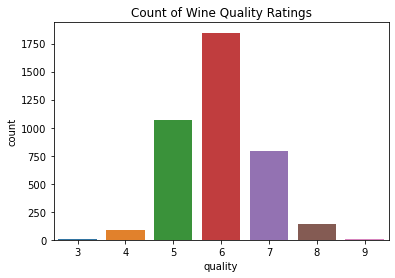

In [28]:
#Histogram of Wine Quality with Seaborn
print('Wine Quality')
sns.countplot(x='quality', data=df).set_title('Count of Wine Quality Ratings')

In [29]:
df['quality'].value_counts()

6    1847
5    1071
7     788
8     145
4      87
3       9
9       4
Name: quality, dtype: int64

In [30]:
n_q3 = (df.quality == 3).sum()
n_q4 = (df.quality == 4).sum()
n_q5 = (df.quality == 5).sum()
n_q6 = (df.quality == 6).sum()
n_q7 = (df.quality == 7).sum()
n_q8 = (df.quality == 8).sum()
n_q9 = (df.quality == 9).sum()

In [31]:
print("Quality 3: " + str(n_q3))
print("Quality 4: " + str(n_q4))
print("Quality 5: " + str(n_q5))
print("Quality 6: " + str(n_q6))
print("Quality 7: " + str(n_q7))
print("Quality 8: " + str(n_q8))
print("Quality 9: " + str(n_q9))

Quality 3: 9
Quality 4: 87
Quality 5: 1071
Quality 6: 1847
Quality 7: 788
Quality 8: 145
Quality 9: 4


In [32]:
target_n = 500
Q3_change_n = target_n - n_q3
Q4_change_n = target_n - n_q4
Q5_change_n = target_n - n_q5
Q6_change_n = target_n - n_q6
Q7_change_n = target_n - n_q7
Q8_change_n = target_n - n_q8
Q9_change_n = target_n - n_q9

In [33]:
print("Quality 3 n change: " + str(Q3_change_n))
print("Quality 4 n change: " + str(Q4_change_n))
print("Quality 5 n change: " + str(Q5_change_n))
print("Quality 6 n change: " + str(Q6_change_n))
print("Quality 7 n change: " + str(Q7_change_n))
print("Quality 8 n change: " + str(Q8_change_n))
print("Quality 9 n change: " + str(Q9_change_n))



Quality 3 n change: 491
Quality 4 n change: 413
Quality 5 n change: -571
Quality 6 n change: -1347
Quality 7 n change: -288
Quality 8 n change: 355
Quality 9 n change: 496


## Down-sample Quality Categories 5, 6, and 7

In [34]:
target_n = 500
df_q5 = df.loc[df['quality'] == 5].sample(n=target_n)
df_q5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 3980 to 4041
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         500 non-null    float64
 1   volatile_acidity      500 non-null    float64
 2   citric_acid           500 non-null    float64
 3   residual_sugar        500 non-null    float64
 4   chlorides             500 non-null    float64
 5   free_sulfur_dioxide   500 non-null    float64
 6   total_sulfur_dioxide  500 non-null    float64
 7   density               500 non-null    float64
 8   pH                    500 non-null    float64
 9   sulphates             500 non-null    float64
 10  alcohol               500 non-null    float64
 11  quality               500 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 50.8 KB


In [35]:
target_n = 500
df_q6 = df.loc[df['quality'] == 6].sample(n=target_n)
df_q6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 4764 to 1410
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         500 non-null    float64
 1   volatile_acidity      500 non-null    float64
 2   citric_acid           500 non-null    float64
 3   residual_sugar        500 non-null    float64
 4   chlorides             500 non-null    float64
 5   free_sulfur_dioxide   500 non-null    float64
 6   total_sulfur_dioxide  500 non-null    float64
 7   density               500 non-null    float64
 8   pH                    500 non-null    float64
 9   sulphates             500 non-null    float64
 10  alcohol               500 non-null    float64
 11  quality               500 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 50.8 KB


In [36]:
target_n = 500
df_q7 = df.loc[df['quality'] == 7].sample(n=target_n)
df_q7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 3126 to 1633
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         500 non-null    float64
 1   volatile_acidity      500 non-null    float64
 2   citric_acid           500 non-null    float64
 3   residual_sugar        500 non-null    float64
 4   chlorides             500 non-null    float64
 5   free_sulfur_dioxide   500 non-null    float64
 6   total_sulfur_dioxide  500 non-null    float64
 7   density               500 non-null    float64
 8   pH                    500 non-null    float64
 9   sulphates             500 non-null    float64
 10  alcohol               500 non-null    float64
 11  quality               500 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 50.8 KB


In [37]:
df_under = df_q5.append(df_q6, ignore_index=True)
df_under = df_under.append(df_q7, ignore_index=True)
print(df_under)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               6.1              0.22         0.25           12.10      0.035   
1               6.7              0.25         0.31            1.35      0.061   
2               7.8              0.30         0.37            1.30      0.051   
3               7.6              0.39         0.22            2.80      0.036   
4               6.2              0.28         0.43           13.00      0.039   
...             ...               ...          ...             ...        ...   
1495            7.4              0.16         0.33            1.20      0.042   
1496            5.8              0.26         0.18            1.20      0.031   
1497            7.3              0.25         0.42           14.20      0.041   
1498            7.0              0.15         0.28           14.70      0.051   
1499            7.4              0.19         0.49            6.70      0.037   

      free_sulfur_dioxide  

In [38]:
df_under.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000
mean,6.804633,0.264270,0.324867,6.361500,0.041906,34.884333,137.050667,0.993785,3.190693,0.484380,10.63618,6.000000
std,0.725747,0.077905,0.083513,4.930327,0.009658,14.588649,40.931769,0.002946,0.140353,0.100698,1.24871,0.816769
min,4.900000,0.080000,0.120000,0.600000,0.016000,2.000000,28.000000,0.987110,2.830000,0.250000,8.50000,5.000000
25%,6.300000,0.210000,0.270000,1.800000,0.035000,24.000000,107.000000,0.991400,3.090000,0.410000,9.50000,5.000000
50%,6.800000,0.260000,0.310000,5.100000,0.042000,34.000000,133.000000,0.993470,3.180000,0.470000,10.50000,6.000000
75%,7.300000,0.310000,0.370000,9.700000,0.049000,45.000000,166.000000,0.995925,3.280000,0.540000,11.50000,7.000000
max,8.700000,0.485000,0.540000,20.800000,0.070000,78.000000,253.000000,1.001960,3.570000,0.760000,14.20000,7.000000


## Oversample 3, 4, 8, and 9

In [39]:
df_q3 = df.loc[df['quality'] == 3]

n = Q3_change_n
df_q3_over = df_q3

for i in range (0,n):
    df_q3_sample = df_q3.sample(n=3)
    new_record = df_q3_sample.mean(axis=0)
    #print(i)
    print(new_record)
    df_q3_over = pd.concat([df_q3_over, new_record.to_frame().T], ignore_index=True)
    #print(type(new_record))
    



fixed_acidity             6.800000
volatile_acidity          0.260000
citric_acid               0.306667
residual_sugar            9.733333
chlorides                 0.051333
free_sulfur_dioxide      29.333333
total_sulfur_dioxide    165.666667
density                   0.995950
pH                        3.173333
sulphates                 0.486667
alcohol                   9.900000
quality                   3.000000
dtype: float64
fixed_acidity             7.400000
volatile_acidity          0.303333
citric_acid               0.360000
residual_sugar            9.083333
chlorides                 0.043667
free_sulfur_dioxide      25.333333
total_sulfur_dioxide    108.000000
density                   0.993950
pH                        3.226667
sulphates                 0.413333
alcohol                  11.466667
quality                   3.000000
dtype: float64
fixed_acidity            7.433333
volatile_acidity         0.346667
citric_acid              0.380000
residual_sugar           5.5

dtype: float64
fixed_acidity             6.933333
volatile_acidity          0.333333
citric_acid               0.343333
residual_sugar            7.233333
chlorides                 0.037667
free_sulfur_dioxide      19.666667
total_sulfur_dioxide    108.000000
density                   0.993753
pH                        3.143333
sulphates                 0.460000
alcohol                  10.666667
quality                   3.000000
dtype: float64
fixed_acidity             7.333333
volatile_acidity          0.336667
citric_acid               0.376667
residual_sugar            3.950000
chlorides                 0.036000
free_sulfur_dioxide      20.333333
total_sulfur_dioxide    118.000000
density                   0.992887
pH                        3.130000
sulphates                 0.433333
alcohol                  10.966667
quality                   3.000000
dtype: float64
fixed_acidity            6.966667
volatile_acidity         0.343333
citric_acid              0.346667
residual_suga

dtype: float64
fixed_acidity            7.200000
volatile_acidity         0.293333
citric_acid              0.363333
residual_sugar           4.283333
chlorides                0.040667
free_sulfur_dioxide     19.333333
total_sulfur_dioxide    91.000000
density                  0.992133
pH                       3.270000
sulphates                0.383333
alcohol                 11.633333
quality                  3.000000
dtype: float64
fixed_acidity             6.766667
volatile_acidity          0.266667
citric_acid               0.403333
residual_sugar            1.783333
chlorides                 0.037667
free_sulfur_dioxide      15.666667
total_sulfur_dioxide    105.333333
density                   0.991333
pH                        3.366667
sulphates                 0.393333
alcohol                  11.700000
quality                   3.000000
dtype: float64
fixed_acidity            6.866667
volatile_acidity         0.313333
citric_acid              0.330000
residual_sugar           

dtype: float64
fixed_acidity            6.866667
volatile_acidity         0.313333
citric_acid              0.330000
residual_sugar           3.300000
chlorides                0.042000
free_sulfur_dioxide     12.333333
total_sulfur_dioxide    88.000000
density                  0.992967
pH                       3.273333
sulphates                0.433333
alcohol                 10.900000
quality                  3.000000
dtype: float64
fixed_acidity            6.733333
volatile_acidity         0.316667
citric_acid              0.360000
residual_sugar           4.233333
chlorides                0.034667
free_sulfur_dioxide      6.000000
total_sulfur_dioxide    87.333333
density                  0.992867
pH                       3.326667
sulphates                0.433333
alcohol                 11.133333
quality                  3.000000
dtype: float64
fixed_acidity             7.566667
volatile_acidity          0.356667
citric_acid               0.376667
residual_sugar            5.816667

dtype: float64
fixed_acidity             7.333333
volatile_acidity          0.293333
citric_acid               0.336667
residual_sugar            2.150000
chlorides                 0.045667
free_sulfur_dioxide      16.666667
total_sulfur_dioxide    113.666667
density                   0.992833
pH                        3.236667
sulphates                 0.416667
alcohol                  10.833333
quality                   3.000000
dtype: float64
fixed_acidity             6.266667
volatile_acidity          0.276667
citric_acid               0.393333
residual_sugar            5.866667
chlorides                 0.030667
free_sulfur_dioxide      16.000000
total_sulfur_dioxide    109.666667
density                   0.992600
pH                        3.326667
sulphates                 0.413333
alcohol                  11.466667
quality                   3.000000
dtype: float64
fixed_acidity             6.833333
volatile_acidity          0.270000
citric_acid               0.310000
residual_s

dtype: float64
fixed_acidity             6.500000
volatile_acidity          0.306667
citric_acid               0.383333
residual_sugar            4.733333
chlorides                 0.034667
free_sulfur_dioxide      16.000000
total_sulfur_dioxide    122.333333
density                   0.992953
pH                        3.240000
sulphates                 0.470000
alcohol                  10.733333
quality                   3.000000
dtype: float64
fixed_acidity            7.233333
volatile_acidity         0.350000
citric_acid              0.410000
residual_sugar           1.950000
chlorides                0.032000
free_sulfur_dioxide      9.333333
total_sulfur_dioxide    87.333333
density                  0.991653
pH                       3.260000
sulphates                0.430000
alcohol                 11.500000
quality                  3.000000
dtype: float64
fixed_acidity            7.433333
volatile_acidity         0.346667
citric_acid              0.380000
residual_sugar           

dtype: float64
fixed_acidity             6.700000
volatile_acidity          0.270000
citric_acid               0.336667
residual_sugar            8.933333
chlorides                 0.049667
free_sulfur_dioxide      27.333333
total_sulfur_dioxide    113.000000
density                   0.994117
pH                        3.283333
sulphates                 0.450000
alcohol                  11.000000
quality                   3.000000
dtype: float64
fixed_acidity             6.466667
volatile_acidity          0.250000
citric_acid               0.336667
residual_sugar            7.066667
chlorides                 0.043333
free_sulfur_dioxide      26.000000
total_sulfur_dioxide    126.000000
density                   0.993433
pH                        3.250000
sulphates                 0.423333
alcohol                  10.866667
quality                   3.000000
dtype: float64
fixed_acidity            7.333333
volatile_acidity         0.396667
citric_acid              0.336667
residual_suga

dtype: float64
fixed_acidity             7.400000
volatile_acidity          0.303333
citric_acid               0.360000
residual_sugar            9.083333
chlorides                 0.043667
free_sulfur_dioxide      25.333333
total_sulfur_dioxide    108.000000
density                   0.993950
pH                        3.226667
sulphates                 0.413333
alcohol                  11.466667
quality                   3.000000
dtype: float64
fixed_acidity             7.066667
volatile_acidity          0.323333
citric_acid               0.326667
residual_sugar            8.100000
chlorides                 0.045000
free_sulfur_dioxide      18.333333
total_sulfur_dioxide    105.000000
density                   0.994783
pH                        3.230000
sulphates                 0.463333
alcohol                  10.733333
quality                   3.000000
dtype: float64
fixed_acidity            6.600000
volatile_acidity         0.316667
citric_acid              0.386667
residual_suga

In [40]:
df_q3_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         500 non-null    float64
 1   volatile_acidity      500 non-null    float64
 2   citric_acid           500 non-null    float64
 3   residual_sugar        500 non-null    float64
 4   chlorides             500 non-null    float64
 5   free_sulfur_dioxide   500 non-null    float64
 6   total_sulfur_dioxide  500 non-null    float64
 7   density               500 non-null    float64
 8   pH                    500 non-null    float64
 9   sulphates             500 non-null    float64
 10  alcohol               500 non-null    float64
 11  quality               500 non-null    float64
dtypes: float64(12)
memory usage: 47.0 KB


In [41]:
df_q3_over.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,5.8,0.24,0.44,3.50,0.029,5.0,109.0,0.9913,3.53,0.43,11.7,3.0
1,7.1,0.32,0.32,11.00,0.038,16.0,66.0,0.9937,3.24,0.40,11.5,3.0
2,6.9,0.39,0.40,4.60,0.022,5.0,19.0,0.9915,3.31,0.37,12.6,3.0
3,8.3,0.33,0.42,1.15,0.033,18.0,96.0,0.9911,3.20,0.32,12.4,3.0
4,7.5,0.32,0.24,4.60,0.053,8.0,134.0,0.9958,3.14,0.50,9.1,3.0


In [42]:
df_q3_over.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,6.936533,0.309507,0.359047,5.726400,0.039887,18.016000,105.050000,0.993255,3.244247,0.437793,11.062533,3.0
std,0.387110,0.042138,0.028153,2.455991,0.006041,6.999902,26.995558,0.001072,0.069999,0.035387,0.555698,0.0
min,5.800000,0.200000,0.240000,0.700000,0.022000,5.000000,19.000000,0.991100,3.050000,0.320000,9.100000,3.0
25%,6.666667,0.273333,0.336667,3.950000,0.035667,12.333333,87.333333,0.992533,3.193333,0.413333,10.666667,3.0
50%,6.900000,0.306667,0.363333,5.600000,0.040000,18.333333,105.333333,0.993250,3.240000,0.440000,11.066667,3.0
75%,7.200000,0.343333,0.376667,7.216667,0.044000,22.333333,123.583333,0.994017,3.296667,0.460000,11.433333,3.0
max,8.300000,0.480000,0.440000,15.100000,0.060000,42.000000,201.000000,0.997050,3.530000,0.540000,12.600000,3.0


In [43]:
df_q4 = df.loc[df['quality'] == 4]

n = Q4_change_n
df_q4_over = df_q4

for i in range (0,n):
    df_q4_sample = df_q4.sample(n=3)
    new_record = df_q4_sample.mean(axis=0)
    #print(i)
    print(new_record)
    df_q4_over = pd.concat([df_q4_over, new_record.to_frame().T], ignore_index=True)
    #print(type(new_record))
    



fixed_acidity             6.666667
volatile_acidity          0.260000
citric_acid               0.300000
residual_sugar            4.100000
chlorides                 0.047000
free_sulfur_dioxide      14.666667
total_sulfur_dioxide    138.000000
density                   0.995007
pH                        3.266667
sulphates                 0.446667
alcohol                   9.166667
quality                   4.000000
dtype: float64
fixed_acidity            7.666667
volatile_acidity         0.230000
citric_acid              0.363333
residual_sugar           2.466667
chlorides                0.041667
free_sulfur_dioxide      9.000000
total_sulfur_dioxide    93.000000
density                  0.994360
pH                       3.226667
sulphates                0.496667
alcohol                 10.366667
quality                  4.000000
dtype: float64
fixed_acidity             7.033333
volatile_acidity          0.330000
citric_acid               0.430000
residual_sugar           10.266667
ch

dtype: float64
fixed_acidity            8.266667
volatile_acidity         0.216667
citric_acid              0.346667
residual_sugar           2.100000
chlorides                0.037667
free_sulfur_dioxide     17.333333
total_sulfur_dioxide    90.666667
density                  0.992907
pH                       2.980000
sulphates                0.440000
alcohol                 10.933333
quality                  4.000000
dtype: float64
fixed_acidity             6.833333
volatile_acidity          0.360000
citric_acid               0.216667
residual_sugar            6.933333
chlorides                 0.055000
free_sulfur_dioxide      16.333333
total_sulfur_dioxide    113.333333
density                   0.995087
pH                        3.176667
sulphates                 0.433333
alcohol                  10.000000
quality                   4.000000
dtype: float64
fixed_acidity             6.566667
volatile_acidity          0.393333
citric_acid               0.390000
residual_sugar        

dtype: float64
fixed_acidity             7.466667
volatile_acidity          0.356667
citric_acid               0.276667
residual_sugar            6.433333
chlorides                 0.043333
free_sulfur_dioxide      22.000000
total_sulfur_dioxide    118.666667
density                   0.993793
pH                        3.080000
sulphates                 0.446667
alcohol                  10.466667
quality                   4.000000
dtype: float64
fixed_acidity             6.100000
volatile_acidity          0.253333
citric_acid               0.256667
residual_sugar            1.600000
chlorides                 0.050333
free_sulfur_dioxide      12.000000
total_sulfur_dioxide    113.666667
density                   0.992583
pH                        3.196667
sulphates                 0.523333
alcohol                   9.850000
quality                   4.000000
dtype: float64
fixed_acidity             6.466667
volatile_acidity          0.303333
citric_acid               0.216667
residual_s

dtype: float64
fixed_acidity            6.233333
volatile_acidity         0.396667
citric_acid              0.220000
residual_sugar           1.033333
chlorides                0.041333
free_sulfur_dioxide      5.666667
total_sulfur_dioxide    86.333333
density                  0.991280
pH                       3.256667
sulphates                0.483333
alcohol                 10.716667
quality                  4.000000
dtype: float64
fixed_acidity             7.066667
volatile_acidity          0.346667
citric_acid               0.306667
residual_sugar            4.766667
chlorides                 0.044667
free_sulfur_dioxide       9.000000
total_sulfur_dioxide    120.000000
density                   0.993233
pH                        3.160000
sulphates                 0.473333
alcohol                  10.766667
quality                   4.000000
dtype: float64
fixed_acidity             7.166667
volatile_acidity          0.290000
citric_acid               0.290000
residual_sugar        

dtype: float64
fixed_acidity             6.500000
volatile_acidity          0.300000
citric_acid               0.266667
residual_sugar            5.766667
chlorides                 0.050333
free_sulfur_dioxide      24.333333
total_sulfur_dioxide    137.333333
density                   0.994410
pH                        3.176667
sulphates                 0.486667
alcohol                   9.750000
quality                   4.000000
dtype: float64
fixed_acidity             6.533333
volatile_acidity          0.283333
citric_acid               0.230000
residual_sugar            1.833333
chlorides                 0.042333
free_sulfur_dioxide      11.333333
total_sulfur_dioxide    132.666667
density                   0.991950
pH                        3.223333
sulphates                 0.436667
alcohol                  10.866667
quality                   4.000000
dtype: float64
fixed_acidity             7.333333
volatile_acidity          0.360000
citric_acid               0.406667
residual_s

dtype: float64
fixed_acidity             7.133333
volatile_acidity          0.276667
citric_acid               0.343333
residual_sugar            9.500000
chlorides                 0.050667
free_sulfur_dioxide      30.666667
total_sulfur_dioxide    158.333333
density                   0.997060
pH                        3.233333
sulphates                 0.533333
alcohol                   9.500000
quality                   4.000000
dtype: float64
fixed_acidity             6.200000
volatile_acidity          0.386667
citric_acid               0.290000
residual_sugar            4.366667
chlorides                 0.061000
free_sulfur_dioxide      28.333333
total_sulfur_dioxide    174.333333
density                   0.994233
pH                        3.303333
sulphates                 0.436667
alcohol                  10.166667
quality                   4.000000
dtype: float64
fixed_acidity             6.833333
volatile_acidity          0.330000
citric_acid               0.270000
residual_s

dtype: float64
fixed_acidity             7.100000
volatile_acidity          0.253333
citric_acid               0.420000
residual_sugar            6.900000
chlorides                 0.040667
free_sulfur_dioxide      18.333333
total_sulfur_dioxide    132.666667
density                   0.994390
pH                        3.076667
sulphates                 0.483333
alcohol                  10.500000
quality                   4.000000
dtype: float64
fixed_acidity             7.200000
volatile_acidity          0.280000
citric_acid               0.280000
residual_sugar            2.250000
chlorides                 0.043333
free_sulfur_dioxide      13.000000
total_sulfur_dioxide    101.000000
density                   0.992457
pH                        3.026667
sulphates                 0.430000
alcohol                  10.566667
quality                   4.000000
dtype: float64
fixed_acidity             7.033333
volatile_acidity          0.256667
citric_acid               0.260000
residual_s

In [44]:
df_q8 = df.loc[df['quality'] == 8]

n = Q8_change_n
df_q8_over = df_q8

for i in range (0,n):
    df_q8_sample = df_q8.sample(n=3)
    new_record = df_q8_sample.mean(axis=0)
    #print(i)
    print(new_record)
    df_q8_over = pd.concat([df_q8_over, new_record.to_frame().T], ignore_index=True)
    #print(type(new_record))
    



fixed_acidity             6.533333
volatile_acidity          0.333333
citric_acid               0.340000
residual_sugar            5.300000
chlorides                 0.045000
free_sulfur_dioxide      25.666667
total_sulfur_dioxide    111.333333
density                   0.990740
pH                        3.156667
sulphates                 0.496667
alcohol                  12.400000
quality                   8.000000
dtype: float64
fixed_acidity             7.466667
volatile_acidity          0.263333
citric_acid               0.270000
residual_sugar            9.933333
chlorides                 0.038000
free_sulfur_dioxide      27.333333
total_sulfur_dioxide    127.666667
density                   0.994563
pH                        3.013333
sulphates                 0.426667
alcohol                  10.666667
quality                   8.000000
dtype: float64
fixed_acidity             6.666667
volatile_acidity          0.300000
citric_acid               0.433333
residual_sugar           

dtype: float64
fixed_acidity             6.800000
volatile_acidity          0.260000
citric_acid               0.300000
residual_sugar            6.300000
chlorides                 0.046000
free_sulfur_dioxide      37.666667
total_sulfur_dioxide    161.333333
density                   0.992963
pH                        3.146667
sulphates                 0.463333
alcohol                  11.066667
quality                   8.000000
dtype: float64
fixed_acidity             7.166667
volatile_acidity          0.280000
citric_acid               0.353333
residual_sugar            3.900000
chlorides                 0.040000
free_sulfur_dioxide      27.333333
total_sulfur_dioxide    110.333333
density                   0.992733
pH                        3.243333
sulphates                 0.503333
alcohol                  11.133333
quality                   8.000000
dtype: float64
fixed_acidity             7.266667
volatile_acidity          0.226667
citric_acid               0.353333
residual_s

fixed_acidity            6.266667
volatile_acidity         0.230000
citric_acid              0.323333
residual_sugar           4.166667
chlorides                0.040000
free_sulfur_dioxide     23.666667
total_sulfur_dioxide    86.333333
density                  0.991020
pH                       3.193333
sulphates                0.443333
alcohol                 11.933333
quality                  8.000000
dtype: float64
fixed_acidity             7.366667
volatile_acidity          0.236667
citric_acid               0.373333
residual_sugar           11.133333
chlorides                 0.046667
free_sulfur_dioxide      42.666667
total_sulfur_dioxide    157.166667
density                   0.996743
pH                        3.116667
sulphates                 0.510000
alcohol                   9.866667
quality                   8.000000
dtype: float64
fixed_acidity            6.600000
volatile_acidity         0.256667
citric_acid              0.300000
residual_sugar           7.133333
chlori

dtype: float64
fixed_acidity             7.100000
volatile_acidity          0.206667
citric_acid               0.383333
residual_sugar            7.233333
chlorides                 0.040000
free_sulfur_dioxide      46.000000
total_sulfur_dioxide    154.333333
density                   0.993957
pH                        3.146667
sulphates                 0.506667
alcohol                  10.900000
quality                   8.000000
dtype: float64
fixed_acidity             6.600000
volatile_acidity          0.326667
citric_acid               0.360000
residual_sugar            4.233333
chlorides                 0.034333
free_sulfur_dioxide      44.666667
total_sulfur_dioxide    153.333333
density                   0.991377
pH                        3.170000
sulphates                 0.443333
alcohol                  11.833333
quality                   8.000000
dtype: float64
fixed_acidity             7.333333
volatile_acidity          0.176667
citric_acid               0.360000
residual_s

dtype: float64
fixed_acidity             6.233333
volatile_acidity          0.213333
citric_acid               0.400000
residual_sugar            2.566667
chlorides                 0.032333
free_sulfur_dioxide      31.333333
total_sulfur_dioxide    134.000000
density                   0.991667
pH                        3.416667
sulphates                 0.536667
alcohol                  11.466667
quality                   8.000000
dtype: float64
fixed_acidity             6.800000
volatile_acidity          0.233333
citric_acid               0.300000
residual_sugar            8.533333
chlorides                 0.040000
free_sulfur_dioxide      38.000000
total_sulfur_dioxide    153.166667
density                   0.993713
pH                        3.186667
sulphates                 0.376667
alcohol                  11.400000
quality                   8.000000
dtype: float64
fixed_acidity             7.066667
volatile_acidity          0.296667
citric_acid               0.323333
residual_s

dtype: float64
fixed_acidity             7.266667
volatile_acidity          0.293333
citric_acid               0.373333
residual_sugar            7.900000
chlorides                 0.041333
free_sulfur_dioxide      38.666667
total_sulfur_dioxide    148.666667
density                   0.993697
pH                        3.060000
sulphates                 0.430000
alcohol                  11.066667
quality                   8.000000
dtype: float64
fixed_acidity             7.166667
volatile_acidity          0.240000
citric_acid               0.383333
residual_sugar            7.500000
chlorides                 0.044667
free_sulfur_dioxide      34.333333
total_sulfur_dioxide    130.000000
density                   0.993823
pH                        3.210000
sulphates                 0.473333
alcohol                  11.066667
quality                   8.000000
dtype: float64
fixed_acidity             6.533333
volatile_acidity          0.230000
citric_acid               0.343333
residual_s

dtype: float64
fixed_acidity             6.266667
volatile_acidity          0.230000
citric_acid               0.326667
residual_sugar            2.933333
chlorides                 0.036000
free_sulfur_dioxide      38.666667
total_sulfur_dioxide    115.666667
density                   0.991113
pH                        3.306667
sulphates                 0.536667
alcohol                  12.100000
quality                   8.000000
dtype: float64
fixed_acidity             6.033333
volatile_acidity          0.213333
citric_acid               0.386667
residual_sugar           11.300000
chlorides                 0.040667
free_sulfur_dioxide      41.000000
total_sulfur_dioxide    155.500000
density                   0.994377
pH                        3.223333
sulphates                 0.393333
alcohol                  11.100000
quality                   8.000000
dtype: float64
fixed_acidity             7.266667
volatile_acidity          0.256667
citric_acid               0.340000
residual_s

fixed_acidity             6.966667
volatile_acidity          0.246667
citric_acid               0.316667
residual_sugar            5.666667
chlorides                 0.037667
free_sulfur_dioxide      44.666667
total_sulfur_dioxide    128.666667
density                   0.992093
pH                        3.216667
sulphates                 0.560000
alcohol                  11.966667
quality                   8.000000
dtype: float64
fixed_acidity             6.466667
volatile_acidity          0.283333
citric_acid               0.383333
residual_sugar            4.600000
chlorides                 0.034333
free_sulfur_dioxide      51.333333
total_sulfur_dioxide    149.666667
density                   0.992043
pH                        3.236667
sulphates                 0.433333
alcohol                  11.433333
quality                   8.000000
dtype: float64
fixed_acidity            6.500000
volatile_acidity         0.343333
citric_acid              0.296667
residual_sugar           4.9

dtype: float64
fixed_acidity             7.033333
volatile_acidity          0.263333
citric_acid               0.286667
residual_sugar            3.933333
chlorides                 0.039000
free_sulfur_dioxide      20.000000
total_sulfur_dioxide    108.333333
density                   0.993263
pH                        3.256667
sulphates                 0.533333
alcohol                  10.633333
quality                   8.000000
dtype: float64
fixed_acidity             5.600000
volatile_acidity          0.320000
citric_acid               0.376667
residual_sugar            6.433333
chlorides                 0.032000
free_sulfur_dioxide      29.666667
total_sulfur_dioxide    113.333333
density                   0.990733
pH                        3.206667
sulphates                 0.386667
alcohol                  12.400000
quality                   8.000000
dtype: float64
fixed_acidity             6.666667
volatile_acidity          0.253333
citric_acid               0.400000
residual_s

fixed_acidity             6.600000
volatile_acidity          0.283333
citric_acid               0.320000
residual_sugar            9.766667
chlorides                 0.037000
free_sulfur_dioxide      30.666667
total_sulfur_dioxide    119.333333
density                   0.994583
pH                        3.283333
sulphates                 0.516667
alcohol                  11.000000
quality                   8.000000
dtype: float64
fixed_acidity             7.266667
volatile_acidity          0.223333
citric_acid               0.290000
residual_sugar           12.133333
chlorides                 0.046333
free_sulfur_dioxide      45.000000
total_sulfur_dioxide    160.166667
density                   0.996153
pH                        3.023333
sulphates                 0.416667
alcohol                  10.000000
quality                   8.000000
dtype: float64
fixed_acidity             6.966667
volatile_acidity          0.290000
citric_acid               0.316667
residual_sugar           

fixed_acidity             6.266667
volatile_acidity          0.276667
citric_acid               0.390000
residual_sugar            6.800000
chlorides                 0.042000
free_sulfur_dioxide      43.666667
total_sulfur_dioxide    140.333333
density                   0.992417
pH                        3.106667
sulphates                 0.416667
alcohol                  11.266667
quality                   8.000000
dtype: float64
fixed_acidity             6.766667
volatile_acidity          0.250000
citric_acid               0.340000
residual_sugar           11.066667
chlorides                 0.040667
free_sulfur_dioxide      38.000000
total_sulfur_dioxide    145.833333
density                   0.995180
pH                        3.190000
sulphates                 0.510000
alcohol                  10.633333
quality                   8.000000
dtype: float64
fixed_acidity             6.900000
volatile_acidity          0.256667
citric_acid               0.350000
residual_sugar           

In [45]:
df_q9 = df.loc[df['quality'] == 9]

n = Q9_change_n
df_q9_over = df_q9

for i in range (0,n):
    df_q9_sample = df_q9.sample(n=3)
    new_record = df_q9_sample.mean(axis=0)
    #print(i)
    print(new_record)
    df_q9_over = pd.concat([df_q9_over, new_record.to_frame().T], ignore_index=True)
    #print(type(new_record))
    



fixed_acidity             6.966667
volatile_acidity          0.320000
citric_acid               0.330000
residual_sugar            2.600000
chlorides                 0.023333
free_sulfur_dioxide      36.000000
total_sulfur_dioxide    114.333333
density                   0.990000
pH                        3.323333
sulphates                 0.483333
alcohol                  12.533333
quality                   9.000000
dtype: float64
fixed_acidity             7.033333
volatile_acidity          0.286667
citric_acid               0.380000
residual_sugar            1.933333
chlorides                 0.028000
free_sulfur_dioxide      27.333333
total_sulfur_dioxide    112.333333
density                   0.990167
pH                        3.353333
sulphates                 0.503333
alcohol                  12.600000
quality                   9.000000
dtype: float64
fixed_acidity             7.033333
volatile_acidity          0.286667
citric_acid               0.380000
residual_sugar           

dtype: float64
fixed_acidity             7.133333
volatile_acidity          0.286667
citric_acid               0.396667
residual_sugar            2.800000
chlorides                 0.027000
free_sulfur_dioxide      38.333333
total_sulfur_dioxide    123.666667
density                   0.990217
pH                        3.310000
sulphates                 0.420000
alcohol                  12.700000
quality                   9.000000
dtype: float64
fixed_acidity             7.033333
volatile_acidity          0.286667
citric_acid               0.380000
residual_sugar            1.933333
chlorides                 0.028000
free_sulfur_dioxide      27.333333
total_sulfur_dioxide    112.333333
density                   0.990167
pH                        3.353333
sulphates                 0.503333
alcohol                  12.600000
quality                   9.000000
dtype: float64
fixed_acidity             6.966667
volatile_acidity          0.320000
citric_acid               0.330000
residual_s

dtype: float64
fixed_acidity             7.033333
volatile_acidity          0.286667
citric_acid               0.380000
residual_sugar            1.933333
chlorides                 0.028000
free_sulfur_dioxide      27.333333
total_sulfur_dioxide    112.333333
density                   0.990167
pH                        3.353333
sulphates                 0.503333
alcohol                  12.600000
quality                   9.000000
dtype: float64
fixed_acidity             6.866667
volatile_acidity          0.326667
citric_acid               0.373333
residual_sugar            2.666667
chlorides                 0.023667
free_sulfur_dioxide      37.333333
total_sulfur_dioxide    105.666667
density                   0.989917
pH                        3.353333
sulphates                 0.463333
alcohol                  12.666667
quality                   9.000000
dtype: float64
fixed_acidity             7.033333
volatile_acidity          0.286667
citric_acid               0.380000
residual_s

dtype: float64
fixed_acidity             7.133333
volatile_acidity          0.286667
citric_acid               0.396667
residual_sugar            2.800000
chlorides                 0.027000
free_sulfur_dioxide      38.333333
total_sulfur_dioxide    123.666667
density                   0.990217
pH                        3.310000
sulphates                 0.420000
alcohol                  12.700000
quality                   9.000000
dtype: float64
fixed_acidity             7.033333
volatile_acidity          0.286667
citric_acid               0.380000
residual_sugar            1.933333
chlorides                 0.028000
free_sulfur_dioxide      27.333333
total_sulfur_dioxide    112.333333
density                   0.990167
pH                        3.353333
sulphates                 0.503333
alcohol                  12.600000
quality                   9.000000
dtype: float64
fixed_acidity             6.966667
volatile_acidity          0.320000
citric_acid               0.330000
residual_s

dtype: float64
fixed_acidity             7.133333
volatile_acidity          0.286667
citric_acid               0.396667
residual_sugar            2.800000
chlorides                 0.027000
free_sulfur_dioxide      38.333333
total_sulfur_dioxide    123.666667
density                   0.990217
pH                        3.310000
sulphates                 0.420000
alcohol                  12.700000
quality                   9.000000
dtype: float64
fixed_acidity             7.033333
volatile_acidity          0.286667
citric_acid               0.380000
residual_sugar            1.933333
chlorides                 0.028000
free_sulfur_dioxide      27.333333
total_sulfur_dioxide    112.333333
density                   0.990167
pH                        3.353333
sulphates                 0.503333
alcohol                  12.600000
quality                   9.000000
dtype: float64
fixed_acidity             6.866667
volatile_acidity          0.326667
citric_acid               0.373333
residual_s

dtype: float64
fixed_acidity             7.033333
volatile_acidity          0.286667
citric_acid               0.380000
residual_sugar            1.933333
chlorides                 0.028000
free_sulfur_dioxide      27.333333
total_sulfur_dioxide    112.333333
density                   0.990167
pH                        3.353333
sulphates                 0.503333
alcohol                  12.600000
quality                   9.000000
dtype: float64
fixed_acidity             7.033333
volatile_acidity          0.286667
citric_acid               0.380000
residual_sugar            1.933333
chlorides                 0.028000
free_sulfur_dioxide      27.333333
total_sulfur_dioxide    112.333333
density                   0.990167
pH                        3.353333
sulphates                 0.503333
alcohol                  12.600000
quality                   9.000000
dtype: float64
fixed_acidity             6.966667
volatile_acidity          0.320000
citric_acid               0.330000
residual_s

fixed_acidity             7.033333
volatile_acidity          0.286667
citric_acid               0.380000
residual_sugar            1.933333
chlorides                 0.028000
free_sulfur_dioxide      27.333333
total_sulfur_dioxide    112.333333
density                   0.990167
pH                        3.353333
sulphates                 0.503333
alcohol                  12.600000
quality                   9.000000
dtype: float64
fixed_acidity             7.033333
volatile_acidity          0.286667
citric_acid               0.380000
residual_sugar            1.933333
chlorides                 0.028000
free_sulfur_dioxide      27.333333
total_sulfur_dioxide    112.333333
density                   0.990167
pH                        3.353333
sulphates                 0.503333
alcohol                  12.600000
quality                   9.000000
dtype: float64
fixed_acidity             6.966667
volatile_acidity          0.320000
citric_acid               0.330000
residual_sugar           

dtype: float64
fixed_acidity             6.866667
volatile_acidity          0.326667
citric_acid               0.373333
residual_sugar            2.666667
chlorides                 0.023667
free_sulfur_dioxide      37.333333
total_sulfur_dioxide    105.666667
density                   0.989917
pH                        3.353333
sulphates                 0.463333
alcohol                  12.666667
quality                   9.000000
dtype: float64
fixed_acidity             6.866667
volatile_acidity          0.326667
citric_acid               0.373333
residual_sugar            2.666667
chlorides                 0.023667
free_sulfur_dioxide      37.333333
total_sulfur_dioxide    105.666667
density                   0.989917
pH                        3.353333
sulphates                 0.463333
alcohol                  12.666667
quality                   9.000000
dtype: float64
fixed_acidity             6.966667
volatile_acidity          0.320000
citric_acid               0.330000
residual_s

In [46]:
df_q9_over.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,6.996133,0.304987,0.369913,2.471467,0.025544,34.391333,113.564000,0.990073,3.336687,0.470047,12.623000,9.0
std,0.098251,0.019143,0.024703,0.356377,0.002129,4.652949,6.453585,0.000125,0.019285,0.031266,0.064303,0.0
min,6.600000,0.240000,0.290000,1.600000,0.018000,24.000000,85.000000,0.989650,3.280000,0.360000,12.400000,9.0
25%,6.866667,0.286667,0.373333,1.933333,0.023667,27.333333,105.666667,0.989917,3.323333,0.463333,12.600000,9.0
50%,7.033333,0.286667,0.376667,2.600000,0.027000,36.000000,112.333333,0.990167,3.353333,0.483333,12.600000,9.0
75%,7.033333,0.326667,0.380000,2.666667,0.028000,37.333333,114.333333,0.990167,3.353333,0.503333,12.666667,9.0
max,7.400000,0.360000,0.490000,4.200000,0.032000,57.000000,139.000000,0.990550,3.410000,0.610000,12.900000,9.0


In [47]:
df_q9_over.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,6.996133,0.304987,0.369913,2.471467,0.025544,34.391333,113.564000,0.990073,3.336687,0.470047,12.623000,9.0
std,0.098251,0.019143,0.024703,0.356377,0.002129,4.652949,6.453585,0.000125,0.019285,0.031266,0.064303,0.0
min,6.600000,0.240000,0.290000,1.600000,0.018000,24.000000,85.000000,0.989650,3.280000,0.360000,12.400000,9.0
25%,6.866667,0.286667,0.373333,1.933333,0.023667,27.333333,105.666667,0.989917,3.323333,0.463333,12.600000,9.0
50%,7.033333,0.286667,0.376667,2.600000,0.027000,36.000000,112.333333,0.990167,3.353333,0.483333,12.600000,9.0
75%,7.033333,0.326667,0.380000,2.666667,0.028000,37.333333,114.333333,0.990167,3.353333,0.503333,12.666667,9.0
max,7.400000,0.360000,0.490000,4.200000,0.032000,57.000000,139.000000,0.990550,3.410000,0.610000,12.900000,9.0


In [48]:
df_over = df_q3_over.append(df_q4_over, ignore_index=True)

df_over = df_over.append(df_q8_over, ignore_index=True)
df_over = df_over.append(df_q9_over, ignore_index=True)

print(df_over)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          5.800000          0.240000     0.440000        3.500000   0.029000   
1          7.100000          0.320000     0.320000       11.000000   0.038000   
2          6.900000          0.390000     0.400000        4.600000   0.022000   
3          8.300000          0.330000     0.420000        1.150000   0.033000   
4          7.500000          0.320000     0.240000        4.600000   0.053000   
...             ...               ...          ...             ...        ...   
1995       7.033333          0.286667     0.380000        1.933333   0.028000   
1996       7.133333          0.286667     0.396667        2.800000   0.027000   
1997       6.866667          0.326667     0.373333        2.666667   0.023667   
1998       6.866667          0.326667     0.373333        2.666667   0.023667   
1999       6.866667          0.326667     0.373333        2.666667   0.023667   

      free_sulfur_dioxide  

In [49]:
df_over.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,6.931567,0.295093,0.343512,4.812067,0.037355,27.252000,116.674667,0.992476,3.237403,0.457155,11.362925,6.000000
std,0.447713,0.048379,0.050675,2.839791,0.009441,11.474371,25.410969,0.002046,0.103887,0.058533,1.073019,2.550147
min,4.900000,0.110000,0.110000,0.700000,0.016000,3.000000,19.000000,0.987130,2.830000,0.250000,8.400000,3.000000
25%,6.700000,0.270000,0.316667,2.600000,0.028000,18.333333,105.666667,0.990217,3.163333,0.420000,10.566667,3.750000
50%,6.966667,0.293333,0.350000,4.200000,0.038000,27.333333,114.333333,0.992567,3.250000,0.460000,11.300000,6.000000
75%,7.133333,0.326667,0.380000,6.600000,0.044333,37.000000,129.333333,0.993868,3.323333,0.490000,12.533333,8.250000
max,8.700000,0.480000,0.540000,15.400000,0.069000,75.000000,212.500000,1.000600,3.560000,0.760000,14.000000,9.000000


In [50]:
df_over.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,5.8,0.24,0.44,3.50,0.029,5.0,109.0,0.9913,3.53,0.43,11.7,3.0
1,7.1,0.32,0.32,11.00,0.038,16.0,66.0,0.9937,3.24,0.40,11.5,3.0
2,6.9,0.39,0.40,4.60,0.022,5.0,19.0,0.9915,3.31,0.37,12.6,3.0
3,8.3,0.33,0.42,1.15,0.033,18.0,96.0,0.9911,3.20,0.32,12.4,3.0
4,7.5,0.32,0.24,4.60,0.053,8.0,134.0,0.9958,3.14,0.50,9.1,3.0


In [51]:
df_balanced = df_under.append(df_over, ignore_index=True)



In [52]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3500 non-null   float64
 1   volatile_acidity      3500 non-null   float64
 2   citric_acid           3500 non-null   float64
 3   residual_sugar        3500 non-null   float64
 4   chlorides             3500 non-null   float64
 5   free_sulfur_dioxide   3500 non-null   float64
 6   total_sulfur_dioxide  3500 non-null   float64
 7   density               3500 non-null   float64
 8   pH                    3500 non-null   float64
 9   sulphates             3500 non-null   float64
 10  alcohol               3500 non-null   float64
 11  quality               3500 non-null   float64
dtypes: float64(12)
memory usage: 328.2 KB


In [53]:
df_balanced.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [54]:

# creating a dictionary  
# with column name and data type 
data_types_dict = {'quality': int} 
  
# we will change the data type  
# of id column to str by giving 
# the dict to the astype method 
df_balanced = df_balanced.astype(data_types_dict) 

  
# checking the data types 
# using df.dtypes method 
df_balanced.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [55]:
df_balanced.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,6.877167,0.281883,0.335521,5.476110,0.039305,30.523000,125.407238,0.993037,3.217385,0.468823,11.051463,6.000000
std,0.586609,0.064576,0.067381,3.950842,0.009796,13.441219,34.472706,0.002555,0.123043,0.080517,1.206306,2.000286
min,4.900000,0.080000,0.110000,0.600000,0.016000,2.000000,19.000000,0.987110,2.830000,0.250000,8.400000,3.000000
25%,6.500000,0.240000,0.293333,2.400000,0.032000,20.333333,105.666667,0.990890,3.136667,0.420000,10.129167,4.000000
50%,6.900000,0.286667,0.333333,4.500000,0.039667,29.333333,120.000000,0.992833,3.220000,0.463333,11.000000,6.000000
75%,7.200000,0.320000,0.380000,7.500000,0.046000,38.333333,143.000000,0.994552,3.310000,0.503333,12.166667,8.000000
max,8.700000,0.485000,0.540000,20.800000,0.070000,78.000000,253.000000,1.001960,3.570000,0.760000,14.200000,9.000000


In [56]:
df_balanced.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,6.1,0.22,0.25,12.10,0.035,54.0,135.0,0.99481,3.21,0.40,10.7,5
1,6.7,0.25,0.31,1.35,0.061,30.5,218.0,0.99388,3.16,0.53,9.5,5
2,7.8,0.30,0.37,1.30,0.051,16.0,96.0,0.99410,3.32,0.62,10.0,5
3,7.6,0.39,0.22,2.80,0.036,19.0,113.0,0.99260,3.03,0.29,10.2,5
4,6.2,0.28,0.43,13.00,0.039,64.0,233.0,0.99745,3.08,0.38,8.9,5


In [57]:
df_balanced.to_csv('whitewinebalanced_outliersremoved.csv',index=False)